##<mark>Importing Dataset</mark>

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
dir(iris_dataset)


['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

####<mark>Creating dataframe</mark>

In [9]:
import pandas as pd
df = pd.DataFrame(iris_dataset.data,columns=iris_dataset.feature_names)
df['target'] =iris_dataset.target
df = df[df.target<2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


##<mark>Plotting</mark>

In [ ]:
from matplotlib import pyplot as plt
df0 = df[df.target==0]
df1 = df[df.target==1]
plt.scatter(df0["sepal width (cm)"],df0["sepal length (cm)"])
plt.scatter(df1["sepal width (cm)"],df1["sepal length (cm)"])

##<mark>Train Test Split</mark>


In [16]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'],axis = 'columns')
y = df.target
X_train,X_test,y_train,y_test = train_test_split( X , y , test_size = 0.2 )

##<mark>Model Fitting</mark>

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10)
model.fit(X_train,y_train)


RandomForestClassifier(n_estimators=10)

####<mark>Predictions and Score</mark>

In [18]:
predicted_values = model.predict(X_test)
model.score(X_test,y_test)

1.0

##<mark>Confusion Matrix</mark>


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_values)


Text(95.72222222222221, 0.5, 'Actual/True Values')

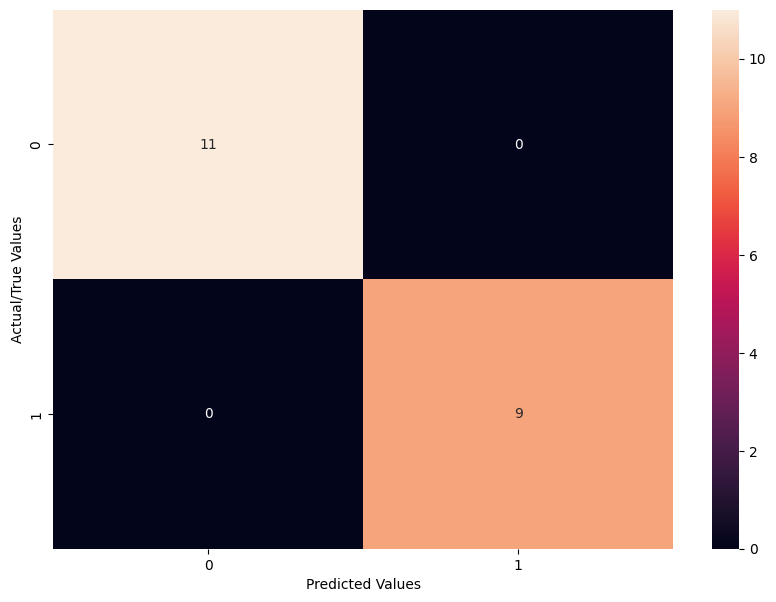

In [24]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm , annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual/True Values")